In [3]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns 

In [5]:
df1=pd.read_csv(('../Dataset/Bengaluru_House_Data.csv'))

In [6]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [8]:
df1.shape

(13320, 9)

In [10]:
df1=df1.drop(['area_type','society','balcony','availability'],axis='columns')

In [11]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [12]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [13]:
df1=df1.dropna()

In [16]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [17]:
# Function to extract numeric value from size column
import re  
def extract_number(size_str):
    match = re.search(r'\d+', size_str)
    if match:
        return int(match.group())
    return None

# Apply the function to the size column
df1['BHK'] = df1['size'].apply(extract_number)

In [19]:
df1['BHK'].unique()
df1['BHK'].info()

<class 'pandas.core.series.Series'>
Index: 13246 entries, 0 to 13319
Series name: BHK
Non-Null Count  Dtype
--------------  -----
13246 non-null  int64
dtypes: int64(1)
memory usage: 207.0 KB


In [20]:
df1.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [22]:
def is_float(value):
    try:
        float(value)
        return True
    except ValueError:
        return False
df1[~df1['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [28]:
df1['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [23]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    
    try:
        return float(x)
    except:
        return None

In [29]:
convert_sqft_to_num('100-1000')

550.0

In [42]:
df1['total_sqrt_con']=df1['total_sqft'].apply(convert_sqft_to_num)

In [43]:
df1.head()

,location,size,total_sqft,bath,price,BHK,total_sqrt_con
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,2600.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,1440.0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,1521.0
4,Kothanur,2 BHK,1200,2.0,51.00,2,1200.0


In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13246 non-null  object 
 1   size            13246 non-null  object 
 2   total_sqft      13246 non-null  object 
 3   bath            13246 non-null  float64
 4   price           13246 non-null  float64
 5   BHK             13246 non-null  int64  
 6   total_sqrt_con  13200 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 827.9+ KB


In [45]:
df1.head()

,location,size,total_sqft,bath,price,BHK,total_sqrt_con
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,2600.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,1440.0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,1521.0
4,Kothanur,2 BHK,1200,2.0,51.00,2,1200.0


In [48]:
df1['pps']=(df1['price']*100000)/df1['total_sqrt_con']
df1.head().round(2)

,location,size,total_sqft,bath,price,BHK,total_sqrt_con,pps
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.0,3699.81
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,2600.0,4615.38
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,1440.0,4305.56
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,1521.0,6245.89
4,Kothanur,2 BHK,1200,2.0,51.00,2,1200.0,4250.00


In [53]:
len(df1['location'].unique())

1304

In [55]:
location_stats=df1.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield                                            534
Sarjapur  Road                                        392
Electronic City                                       302
Kanakpura Road                                        266
Thanisandra                                           233
                                                     ... 
bsk 6th stage 2ad block near sri conversation hall      1
beml layout, basaveshwara nagar                         1
basaveshwarnagar                                        1
banashankari stage iii sa                               1
asha township, off hennur road                          1
Name: location, Length: 1304, dtype: int64

In [57]:
len(location_stats[location_stats<=10])

1063

In [58]:
location_tstats_less_than10=location_stats[location_stats<=10]

In [59]:
df1['location']=df1['location'].apply(lambda x: 'other' if x in location_tstats_less_than10 else x)

In [60]:
len(df1['location'].unique())

242

<Axes: xlabel='bath'>

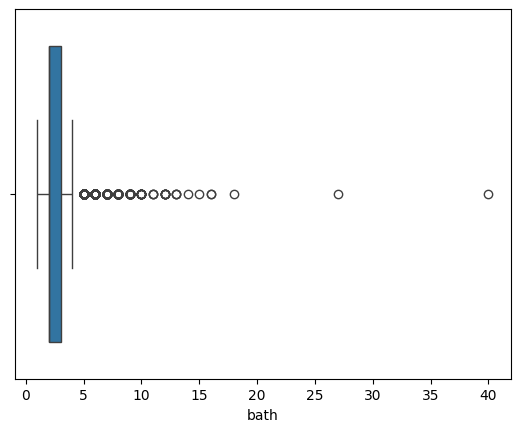

In [78]:
sns.boxplot(data=df1,x='bath')


In [81]:
q1=df1['bath'].quantile(.25)
q3=df1['bath'].quantile(.75)
iqr=q3-q1
upper_limit=q3+(iqr*1.5)
lower_limit=q1-(iqr*1.5)
upper_range,lower_range

(np.float64(4.5), np.float64(0.5))

In [80]:
len(df1['bath']<lower_range)

13246

In [66]:
df1.head()

,location,size,total_sqft,bath,price,BHK,total_sqrt_con,pps
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2 BHK,1200,2.0,51.00,2,1200.0,4250.000000


In [83]:
#trimming-delete the outlier data
new_df=df1.loc[(df1['bath']<upper_limit) | (df1['bath']>lower_limit)]
print("Before removing outliers :",len(df1))
print("After removing outliers :",len(new_df))
print("Outliers",len(df1)-len(new_df))

Before removing outliers : 13246
After removing outliers : 13246
Outliers 0


,location,size,total_sqft,bath,price,BHK,total_sqrt_con,pps
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.0,4,2600.0,4615.384615
9,other,6 Bedroom,1020,6.0,370.0,6,1020.0,36274.509804
11,Whitefield,4 Bedroom,2785,5.0,295.0,4,2785.0,10592.459605
22,Thanisandra,4 Bedroom,2800,5.0,380.0,4,2800.0,13571.428571
45,HSR Layout,8 Bedroom,600,9.0,200.0,8,600.0,33333.333333
...,...,...,...,...,...,...,...,...
13300,Hosakerehalli,5 Bedroom,1500,6.0,145.0,5,1500.0,9666.666667
13303,Vidyaranyapura,5 Bedroom,774,5.0,70.0,5,774.0,9043.927649
13306,other,4 Bedroom,1200,5.0,325.0,4,1200.0,27083.333333
13311,Ramamurthy Nagar,7 Bedroom,1500,9.0,250.0,7,1500.0,16666.666667


In [98]:
#identify thAt which having less than 300 sqr feet rooms which impossible to ave in a home 
df1[(df1['total_sqrt_con']/df1['BHK'])<300].head()

,location,size,total_sqft,bath,price,BHK,total_sqrt_con,pps
9,other,6 Bedroom,1020,6.0,370.0,6,1020.0,36274.509804
45,HSR Layout,8 Bedroom,600,9.0,200.0,8,600.0,33333.333333
58,Murugeshpalya,6 Bedroom,1407,4.0,150.0,6,1407.0,10660.980810
68,other,8 Bedroom,1350,7.0,85.0,8,1350.0,6296.296296
70,other,3 Bedroom,500,3.0,100.0,3,500.0,20000.000000
